### 20110342 - Nguyễn Thanh Trúc

### Yêu cầu:
1. Analyze and Preprocess data - Check if the dataset has missing values or has any other problem.
2. Feature Engineering
3. Divide the dataset into 2 training and test sets
4. Use Pipeline
     a. Use scaler and dimensional reduction (if it is necessary). # sử dụng scaler and giảm số chiều nếu cần
     b. Use suitable Naive Bayes for this problem. # sử dụng naive bayes phù hợp với vấn đề
5. Perform model on training set and test set using gridsearch CV # gridsearch cv
6. Measure performance of the model. # đo hiệu suất mô hình
7. Which metric is your main metric for this problem and why? What are your scaler, dimensional reduction and naive bayes model as well as their params? (<= 200 words, also input your opinion or conclusion here)
<<Số liệu nào là số liệu chính của bạn cho vấn đề này và tại sao? Mô hình scaler, giảm kích thước và bayes ngây thơ của bạn cũng như các thông số của chúng là gì?>> 
(<= 200 từ, đồng thời nhập ý kiến ​​hoặc kết luận của bạn tại đây)

How can I measure your point:
1. Your function is callable and runs correctly
2. The performance of your model (in full pipeline) is acceptable. The final error based on my train and test set is low enough.
3. The data preprocessing is correct or make sense
4. The Feature engineering is correct or make sense
5. Any other additional process will be considered a small plus point.

A Travel Company Is Offering Travel Insurance Packages To Their Customers. The new insurance plan also covers Covid-19. The Company Claims To Know Which Customers Are Interested To Buy It Based On The Company's Database History.

* Age - Age Of The Customer
* Employment Type - The Sector In Which Customer Is Employed
* GraduateOrNot - Whether The Customer Is College Graduate Or Not
* AnnualIncome - The Yearly Income Of The Customer In Indian Rupees
* FamilyMembers - Number Of Members In Customer's Family
* ChronicDisease - Whether The Customer Suffers From Any Major Disease Or Conditions Like Diabetes/High BP or Asthama,etc.
* FrequentFlyer - Derived Data Based On Customer's History Of Booking Air Tickets On Atleast 4 Different Instances In The Last 2 Years (2017-2019).
* EverTravelledAbroad - Has The Customer Ever Travelled To A Foreign Country
* TravelInsurance - Did The Customer Buy Travel Insurance Package During Introductory Offering Held In The Year 2019.

In [1]:
# import the library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# read data
df = pd.read_csv("TravelInsurancePrediction.csv")
df

,Unnamed: 0,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,0,31,Government Sector,Yes,400000,6,1,No,No,0
1,1,31,Private Sector/Self Employed,Yes,1250000,7,0,No,No,0
2,2,34,Private Sector/Self Employed,Yes,500000,4,1,No,No,1
3,3,28,Private Sector/Self Employed,Yes,700000,3,1,No,No,0
4,4,28,Private Sector/Self Employed,Yes,700000,8,1,Yes,No,0
...,...,...,...,...,...,...,...,...,...,...
1982,1982,33,Private Sector/Self Employed,Yes,1500000,4,0,Yes,Yes,1
1983,1983,28,Private Sector/Self Employed,Yes,1750000,5,1,No,Yes,0
1984,1984,28,Private Sector/Self Employed,Yes,1150000,6,1,No,No,0
1985,1985,34,Private Sector/Self Employed,Yes,1000000,6,0,Yes,Yes,1


In [3]:
# Get 5 rows in dataframe
df.head()

,Unnamed: 0,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,0,31,Government Sector,Yes,400000,6,1,No,No,0
1,1,31,Private Sector/Self Employed,Yes,1250000,7,0,No,No,0
2,2,34,Private Sector/Self Employed,Yes,500000,4,1,No,No,1
3,3,28,Private Sector/Self Employed,Yes,700000,3,1,No,No,0
4,4,28,Private Sector/Self Employed,Yes,700000,8,1,Yes,No,0


In [4]:
# Drop "unnamed" columns
df = df.drop('Unnamed: 0', axis = 1)
df

,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,31,Government Sector,Yes,400000,6,1,No,No,0
1,31,Private Sector/Self Employed,Yes,1250000,7,0,No,No,0
2,34,Private Sector/Self Employed,Yes,500000,4,1,No,No,1
3,28,Private Sector/Self Employed,Yes,700000,3,1,No,No,0
4,28,Private Sector/Self Employed,Yes,700000,8,1,Yes,No,0
...,...,...,...,...,...,...,...,...,...
1982,33,Private Sector/Self Employed,Yes,1500000,4,0,Yes,Yes,1
1983,28,Private Sector/Self Employed,Yes,1750000,5,1,No,Yes,0
1984,28,Private Sector/Self Employed,Yes,1150000,6,1,No,No,0
1985,34,Private Sector/Self Employed,Yes,1000000,6,0,Yes,Yes,1


## Data Analysis

In [5]:
# Get categorical columns and numerical columns
categorical_cols = [feature for feature in df.columns if df[feature].dtype == "O"]
numerical_cols = [feature for feature in df.columns if df[feature].dtype != "O"]

In [6]:
# display cathegorical columns
print("Cathegorical : ", categorical_cols)

Cathegorical :  ['Employment Type', 'GraduateOrNot', 'FrequentFlyer', 'EverTravelledAbroad']


In [7]:
# display numerical columns
print("Numerical : ", numerical_cols)

Numerical :  ['Age', 'AnnualIncome', 'FamilyMembers', 'ChronicDiseases', 'TravelInsurance']


In [8]:
df[categorical_cols].isnull().sum() # count and display sum "NULL" values in categorical columns

Employment Type        0
GraduateOrNot          0
FrequentFlyer          0
EverTravelledAbroad    0
dtype: int64

In [9]:
df[numerical_cols].isnull().sum() # count and display sum "NULL" values in numerical columns

Age                0
AnnualIncome       0
FamilyMembers      0
ChronicDiseases    0
TravelInsurance    0
dtype: int64

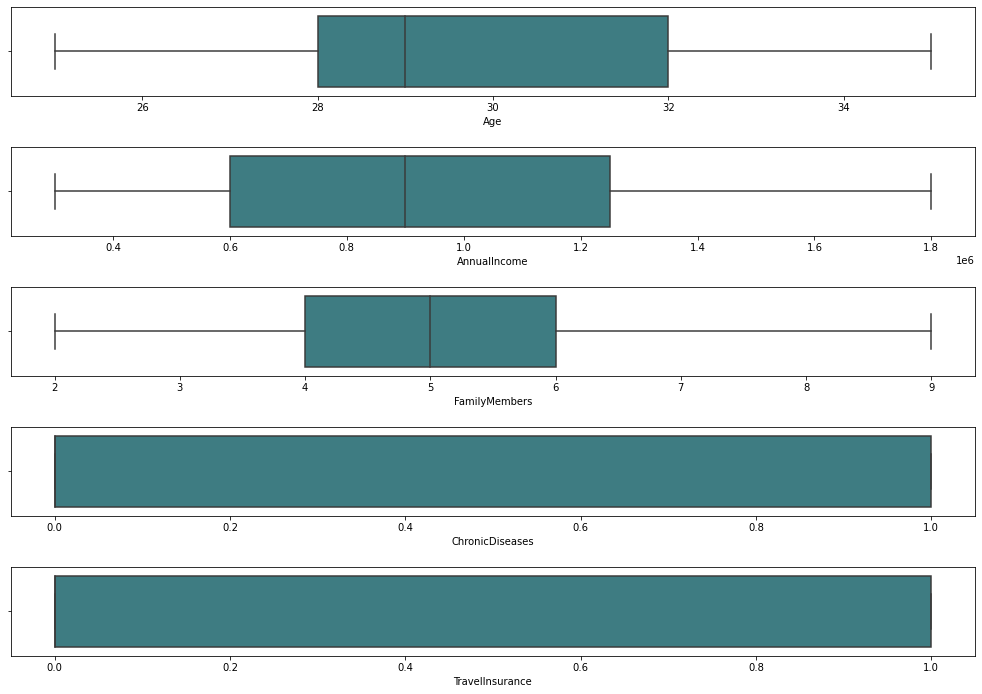

In [10]:
# draw the boxplot of  numerical_cols
fig, axes=plt.subplots(len(numerical_cols), 1, figsize=(14, 2*len(numerical_cols)),sharex=False,sharey=False)

for i, column in enumerate(numerical_cols):
    sns.boxplot(x=column,data=df,palette='crest',ax=axes[i])
plt.tight_layout(pad=2.0)

<AxesSubplot:xlabel='Employment Type', ylabel='Count'>

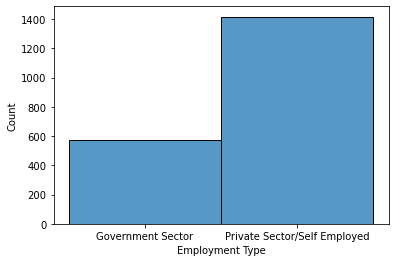

In [11]:
#Xem phân phối của EstimatedSalary
sns.histplot(x="Employment Type", data=df)

<AxesSubplot:ylabel='FrequentFlyer'>

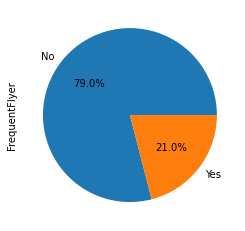

In [12]:
df.FrequentFlyer.value_counts().plot(kind='pie',autopct="%1.1f%%") # draw the pie plot of Frequent Flyer to compare all values inside this columns

<AxesSubplot:ylabel='EverTravelledAbroad'>

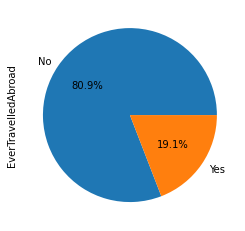

In [13]:
# draw the pie plot of EverTravelledAbroad to compare all values inside this columns
df.EverTravelledAbroad.value_counts().plot(kind='pie',autopct="%1.1f%%") 

<AxesSubplot:>

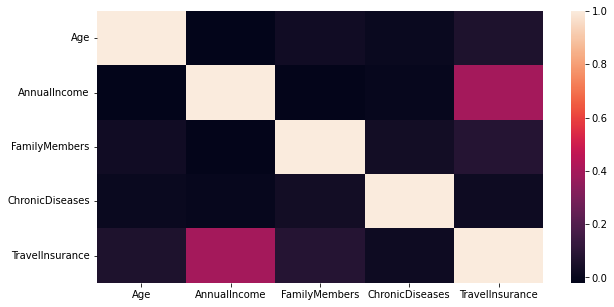

In [14]:
# Draw the heatmap
plt.figure(figsize=(10, 5))
sns.heatmap(df.corr())

## Preprocessing

In [15]:
def preprocessing_data(df):
    """
    Preprocess your data (eg. Drop null datapoints or fill missing data)
    :param df: pandas DataFrame
    :return: pandas DataFrame
    """
    # Todo: preprocess data
    df.drop("GraduateOrNot", axis=1, inplace=True)
    return df

In [16]:
df = preprocessing_data(df.copy()) # print the data frame of above functions



In [17]:
df.head()

,Age,Employment Type,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,31,Government Sector,400000,6,1,No,No,0
1,31,Private Sector/Self Employed,1250000,7,0,No,No,0
2,34,Private Sector/Self Employed,500000,4,1,No,No,1
3,28,Private Sector/Self Employed,700000,3,1,No,No,0
4,28,Private Sector/Self Employed,700000,8,1,Yes,No,0


## Feature Engineering

In [36]:
# import the library
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder

In [37]:
# Heatmap
def apply_feature_engineering(df):
    """
    Apply all feature engineering to transform your data into number
    :param df: pandas DataFrame
    :return: pandas DataFrame
    """
    # Todo: Normalize your data
    df["Employment Type"] = df["Employment Type"].astype("category").cat.codes
    df["FrequentFlyer"] = df["FrequentFlyer"].astype("category").cat.codes
    df["EverTravelledAbroad"] = df["EverTravelledAbroad"].astype("category").cat.codes
    enc = OneHotEncoder()
    enc_data = pd.DataFrame(enc.fit_transform(
    df[['Employment Type', 'FrequentFlyer','EverTravelledAbroad']]).toarray())
    df = df.join(enc_data)
    return df

In [38]:
df = apply_feature_engineering(df)

<AxesSubplot:>

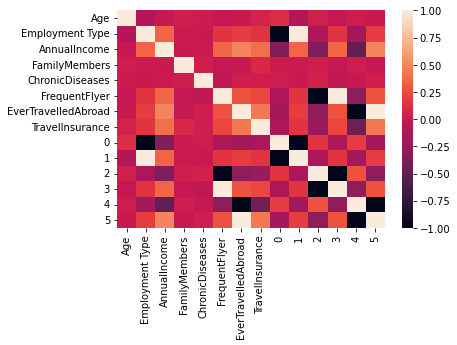

In [39]:
sns.heatmap(df.corr()) # Show heatmap after normalized data

In [40]:
def prepare_X_y(df):
    """
    Feature engineering and create X and y
    :param df: pandas dataframe
    :return: (X, y) output feature matrix (dataframe), target (series)
    """
    # Todo: Split data into X and y (using sklearn train_test_split). Return two dataframes
    feature_names = df.columns.tolist()
    feature_names.remove("TravelInsurance")
    X = df[feature_names].values
    y = df.TravelInsurance.values
    return X, y

In [41]:
X, y = prepare_X_y(df)

# Apply machine learning model

## Train-test split

In [42]:
from sklearn.model_selection import train_test_split
RANDOM_STATE = 42
TRAIN_SIZE = 0.7

X_train,X_test ,Y_train, Y_test = train_test_split(X, y, train_size=TRAIN_SIZE, random_state=RANDOM_STATE)

In [60]:
from sklearn.metrics import classification_report
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV

def build_model(X, y):
    """
    Design your model and train it (including your best params)
    :param X: feature matrix
    :param y: target
    :return: a model
    """
    scaler = MinMaxScaler()
    model = make_pipeline(GaussianNB())
    model.fit(X, y)
    return model

In [74]:
def build_model(X, y):
    """
    Design your model and train it (including your best params)
    :param X: feature matrix
    :param y: target
    :return: a model
    """
    scaler = MinMaxScaler() # Using MinMaxScaler to scaler data
    param_grid_nb = {'var_smoothing': np.logspace(0,-9, num=100)}
    # using gridsearchcv
    model = GridSearchCV(estimator=GaussianNB(), param_grid=param_grid_nb, verbose=2, cv=15, n_jobs=-1)
    model.fit(X, y)
    print(model.best_estimator_)
    return model

In [75]:
def calculate_performance(y_true, y_pred):
    """

    :param y_true: ground truth values
    :param y_pred: predictions
    :return:
    """
    # Todo: return your error value like accuracy, f1score, ...
    # display precision, recall, accuracy, f1
    print("Precision", precision_score(y_true, y_pred)) 
    print("Recall", recall_score(y_true, y_pred))
    print("Accuracy", accuracy_score(y_true, y_pred))
    print("F1", f1_score(y_true, y_pred))

    # Todo: Only choose one of them as your score for the question 7
    main_score = accuracy_score(y_true, y_pred)
    return main_score

In [76]:
model = build_model(X_train, Y_train)

Fitting 15 folds for each of 100 candidates, totalling 1500 fits
GaussianNB(var_smoothing=0.43287612810830584)


In [77]:
# Compare on training dataset
pred_train= model.predict(X_train)
print("Training performance:")
print(classification_report(Y_train, pred_train))
print("Main score:", calculate_performance(Y_train, pred_train))

Training performance:
              precision    recall  f1-score   support

           0       0.77      0.97      0.86       902
           1       0.90      0.45      0.60       488

    accuracy                           0.79      1390
   macro avg       0.83      0.71      0.73      1390
weighted avg       0.81      0.79      0.77      1390

Precision 0.8983739837398373
Recall 0.45286885245901637
Accuracy 0.7899280575539568
F1 0.6021798365122615
Main score: 0.7899280575539568


In [78]:
# Compare on testing dataset
pred_test= model.predict(X_test)
print("Training performance:")
print(classification_report(Y_test, pred_test))
print("Main score:", calculate_performance(Y_test, pred_test))

Training performance:
              precision    recall  f1-score   support

           0       0.75      0.98      0.85       375
           1       0.94      0.44      0.60       222

    accuracy                           0.78       597
   macro avg       0.84      0.71      0.72       597
weighted avg       0.82      0.78      0.76       597

Precision 0.941747572815534
Recall 0.4369369369369369
Accuracy 0.7805695142378559
F1 0.5969230769230769
Main score: 0.7805695142378559


### REPORTING:
- Theo em trong bài toán này, precision (độ chính xác) là quan trọng nhất vì nó đo lường tỉ lệ số lượng khách hàng được dự đoán mua gói bảo hiểm Covid - 19 chính xác so với tổng số khách hàng được dự đoán mua. Đối với công ty du lịch, việc dự đoán chính xác khách hàng nào muốn mua gói bảo hiểm Covid-19 là rất quan trọng để tối ưu chiến lược tiếp thị và đẩy mạnh doanh số. Khi Precision càng cao, tức là việc dự đoán mua gói của khách hàng là chính xác và công ty có thể tận dụng thông tin này để tăng doanh thu. Các chỉ số khác như Recall, F1 hay Accuracy có thể không quan trọng như Precision trong trường hợp này.
- Mô hình này em đã dùng minmaxscaler() của hàm sklearn để giải quyết vấn đề và sau đó chuyển đổi các dạng categorical sang numerical để có thể sử dụng gaussian naive bayes để build model.
- Kết quả trên tập training dataset cho thấy precision đạt chính xác là 0,8984, độ chính xác accuracy đạt 0,7899 và recall đạt 0,4529 và f1 score cũng đạt được 0,6022. Kết quả này cho thấy tập dữ liệu hoạt động tương đối tốt trên tập train 
- Kết quả trên tập test dataset cho thấy precision đạt chính xác là 0,9417; độ chính xác accuracy đạt 0,7806 và recall đạt 0,4369 và f1 score cũng đạt được 0,6969. Kết quả này cho thấy tập dữ liệu hoạt động tương đối tốt trên tập test
- Tóm lại, mô hình được xây dựng thư viện scikit-learn naive bayes hoạt động tốt trên tập dữ liệu train và test với độ precision là 94% và độ chính xác accuracy là 78%. Kết quả cho thấy rằng mô hình hù hợp để dự đoán độ chính xác của biến mục tiêu dựa trên các feature  và label được cung cấp.